In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

In [2]:
from numpy import asarray as arr
from numpy import asmatrix as mat
from numpy import atleast_2d as twod

### Prob 1 Set up

$$J_i(\beta) =  \begin{cases} y^{(i)} \log( f(x^{(i)} \cdot \beta)) & \mbox{if}\  y^{(i)}=1 \\ (1-y^{(i)})\log(1-f(x^{(i)} \cdot \beta)) & \mbox{if}\  y^{(i)}=0 \end{cases}$$


$$ \sigma(r) = (1+exp(-r))^{-1}$$

$$ J_i(\beta) =  y^{(i)} \log( f(x^{(i)} \cdot \beta)) + (1-y^{(i)}) log(1-f(x^{(i)} \cdot \beta))$$ 

Thus, its gradient is:
$$\nabla J_{i,j}(\beta) = \frac{y^{(i)} f ' (x^{(i)} \cdot \beta) \cdot }{f(x^{(i)} \cdot \beta)} - \frac{(1-y^{(i)}) \cdot f ' (x^{(i)} \cdot \beta)}{1-f(x^{(i)} \cdot \beta)}$$ 

$$f ' (x^{(i)} \cdot \beta) = f (x^{(i)} \cdot \beta) \cdot (1-f (x^{(i)} \cdot \beta)) \cdot (x^{(i)} \cdot \beta) '$$

$$f ' (x^{(i)} \cdot \beta) = f (x^{(i)} \cdot \beta) \cdot (1-f (x^{(i)} \cdot \beta)) \cdot x^{(i,j)}$$

$$\nabla J_{i,j}(\beta) = \frac{y^{(i)} f ' (x^{(i)} \cdot \beta)  }{f(x^{(i)} \cdot \beta)} - \frac{(1-y^{(i)}) \cdot f ' (x^{(i)} \cdot \beta)}{1-f(x^{(i)} \cdot \beta)}$$

$$\nabla J_{i,j}(\beta) = \frac{y^{(i)} \cdot x^{(i,j)}\cdot f (x^{(i)} \cdot \beta) \cdot (1-f (x^{(i)} \cdot \beta))  }{f(x^{(i)} \cdot \beta)} - \frac{(1-y^{(i)}) \cdot x^{(i,j)} \cdot f (x^{(i)} \cdot \beta) \cdot (1-f (x^{(i)} \cdot \beta)}{1-f(x^{(i)} \cdot \beta)}$$

$$\nabla J_{i,j}(\beta) = y^{(i)}  \cdot (1-f (x^{(i)} \cdot \beta))\cdot x^{(i,j)} - (1-y^{(i)}) \cdot f (x^{(i)} \cdot \beta)\cdot x^{(i,j)}$$

$$\nabla J_{i,j}(\beta) = y^{(i)}  \cdot (1)\cdot x^{(i,j)} - (1) \cdot f (x^{(i)} \cdot \beta)\cdot x^{(i,j)}$$

$$\nabla J_{i,j}(\beta) = (y^{(i)} - f (x^{(i)} \cdot \beta))\cdot x^{(i,j)}$$

$$\nabla l_{j}(\beta) = \frac{1}{N} \sum_{i=1}^{N} (y^{(i)} - f (x^{(i)} \cdot \beta))\cdot x^{(i,j)}$$

log likelihood grad[j] =  $np.dot((Y-f(X,beta)).T,X[:,j]).T/N$

log likelihood grad    =  $np.dot((Y-f(X,beta)).T,X).T/N$

In [3]:
def f(X,beta):
    return 1/(1+np.exp(-X.dot(beta)))

def dfdx(X,beta):
    # ∂f(x,beta)/∂x = f(x,beta)(1 − f(x,beta))*∂z/∂x 
    return f(X,beta)*(1-f(X,beta))*beta  

def loglike(X,beta,Y):
    N,M = X.shape
    like = [None]*N
    for i in range(N):
        like[i] = np.log(f(X[i,:],beta)) if Y[i] else np.log(1-f(X[i,:],beta))
    return np.mean(like)

def loglike_grad(X,beta,Y):
    N,M = X.shape
    like_grad_beta = [None]*M
    like_grad_beta = np.dot((Y-f(X,beta)).T,X).T/N
    return arr(like_grad_beta)

def err_rate(X,beta,Y):
    N,M = X.shape
    predict = np.zeros(Y.shape)
    predict[f(X,beta)>0.5]=1
    return np.mean(predict!=Y)

def train(X,beta,Y,alpha,stopEpochs=250):
    log_like = arr([None]*stopEpochs)
    for i in range(stopEpochs):
        beta += alpha*loglike_grad(X,beta,Y)
        log_like[i] = loglike(X,beta,Y)
    return beta,log_like
def get_matrix(X,parameter_list,stopEpochs):
    beta_matrix = np.zeros((Xtr.shape[1],len(parameter_list)))
    loglike_matrix = np.zeros((stopEpochs,len(parameter_list)))
    return beta_matrix,loglike_matrix
def load_data_pairs(type_str):
    return pd.read_csv("./mnist_2s_and_6s/"+type_str+"_x.csv").values,pd.read_csv("./mnist_2s_and_6s/"+type_str+"_y.csv").values

### Prob 1.1.1

In [4]:
Xtr,Ytr = load_data_pairs("train")
Xva,Yva = load_data_pairs("valid")
Xte,Yte = load_data_pairs("test")

In [5]:
Xtr = np.hstack([Xtr,np.ones((Xtr.shape[0],1))])
Xva = np.hstack([Xva,np.ones((Xva.shape[0],1))])
Xte = np.hstack([Xte,np.ones((Xte.shape[0],1))])

In [6]:
learning_rate = [1e-3,1e-2,1e-1]
stopEpochs = 250
beta_matrix,loglike_matrix = get_matrix(Xtr,learning_rate,stopEpochs)
for k,rate in enumerate(learning_rate):
    beta = np.random.normal(scale=.001,size=(Xtr.shape[1],1))
    alpha = learning_rate[k]
    beta,log_like = train(Xtr,beta,Ytr,alpha,stopEpochs)
    beta_matrix[:,k] = beta.T.flatten()
    loglike_matrix[:,k] = log_like.T.flatten()
    

In [7]:
validation_loglike = np.zeros((3,1))
for i in range(3):
    validation_loglike[i] = loglike(Xva,beta_matrix[:,i],Yva)
test_loglike = loglike(Xte,beta_matrix[:,np.argmax(validation_loglike)],Yte)

(-0.8, 0.0)

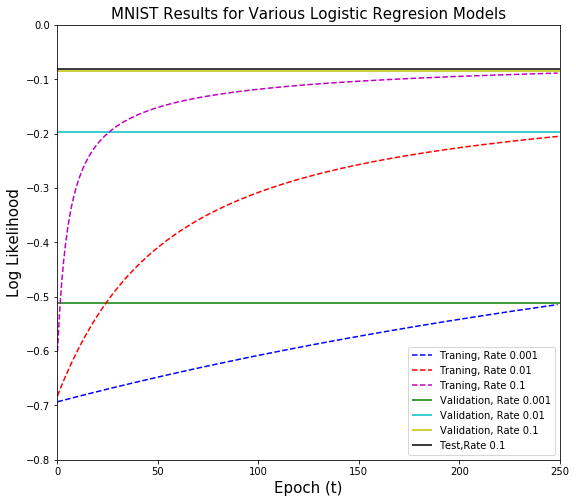

In [8]:
fig,ax = plt.subplots(1,1,figsize=(9,8))
ax.plot(range(stopEpochs),loglike_matrix[:,0],'b--')
ax.hlines(validation_loglike[0], 0, 250, colors='g')
ax.plot(range(stopEpochs),loglike_matrix[:,1],'r--')
ax.hlines(validation_loglike[1], 0, 250, colors='c')
ax.plot(range(stopEpochs),loglike_matrix[:,2],'m--')
ax.hlines(validation_loglike[2], 0, 250, colors='y')
ax.hlines(test_loglike, 0, 250, colors = 'k')
ax.legend(["Traning, Rate 0.001",
           "Traning, Rate 0.01",
           "Traning, Rate 0.1",
           "Validation, Rate 0.001",
           "Validation, Rate 0.01",
           "Validation, Rate 0.1",
          "Test,Rate 0.1"])
ax.set_title("MNIST Results for Various Logistic Regresion Models",fontsize=15)
plt.xlabel("Epoch (t)",fontsize=15)
plt.ylabel("Log Likelihood",fontsize=15)
plt.xlim((0,250))
plt.ylim((-0.8,0.0))

### Prob 1.1.2

In [9]:
Training_Error_list = [None]*3
Validation_Error_list = [None]*3
Test_Error_list = [None]*3
Training_like_list = [None]*3
Validation_like_list = [None]*3
Test_like_list = [None]*3
for i in range(3):
    Training_Error_list[i]  = err_rate(Xtr,beta_matrix[:,i],Ytr)
    Validation_Error_list[i]= err_rate(Xva,beta_matrix[:,i],Yva)
    Test_Error_list[i]      = err_rate(Xte,beta_matrix[:,i],Yte)
    Training_like_list[i]   = loglike(Xtr,beta_matrix[:,i],Ytr)
    Validation_like_list[i] = loglike(Xva,beta_matrix[:,i],Yva)
    Test_like_list[i]       = loglike(Xte,beta_matrix[:,i],Yte)

In [10]:
import pandas as pd
import os
new_dataframe = pd.DataFrame(
    {
        "Training Error" : Training_Error_list,
        "Validation Error":Validation_Error_list,
        "Test Error":Test_Error_list 
    },
    index = ['Rate 0.001','Rate 0.01','Rate 0.1']
)
new_dataframe

,Training Error,Validation Error,Test Error
Rate 0.001,0.055984,0.044782,0.043342
Rate 0.01,0.047005,0.038868,0.034987
Rate 0.1,0.027147,0.024081,0.022454


In [11]:
new_dataframe = pd.DataFrame(
    {
        "Training likelihood" : Training_like_list,
        "Validation likelihood":Validation_like_list,
        "Test likelihood":Test_like_list 
    },
    index = ['Rate 0.001','Rate 0.01','Rate 0.1']
)
new_dataframe

,Training likelihood,Validation likelihood,Test likelihood
Rate 0.001,-0.514495,-0.510975,-0.505024
Rate 0.01,-0.205158,-0.197636,-0.188133
Rate 0.1,-0.088650,-0.085469,-0.080531


### Prob 1.1.3

### Prob 1.2.1

In [12]:
from random import sample

In [15]:
import copy
def loglike_grad_stoch(X,beta,Y,ind):
    sample_stoch = ind
    # print(sample_stoch)
    like_grad_beta = [None]*X.shape[1]
    like_grad_beta = np.dot((Y[sample_stoch]-f(X[sample_stoch],beta)).T,X[sample_stoch,:]).T/M
    return arr(like_grad_beta)

def train_stoch(X,beta,Y,alpha,M,stopEpochs):
    N,P = X.shape
    t_ext = np.int(np.floor(stopEpochs*N/M))
    log_like = arr([None]*stopEpochs)
    j = 0
    res = [np.int(np.floor((t_ext)/stopEpochs)),np.int(np.ceil((t_ext)/stopEpochs))]
    if stopEpochs*res[1]>t_ext:
        res[1] =res[0]
        
    arry = np.arange(N)
    np.random.shuffle(arry)
    # arry_matrix = copy.copy(arry[0:np.int(res[1]*M)]).reshape(res[1],M)
    new_array = np.split(arry[0:np.int(res[1]*M)],res[1])

    for i in range(t_ext):
        ind = new_array[np.int(i%(res[1]))]
        # print(ind)
        beta += alpha*loglike_grad_stoch(X,beta,Y,ind)
        if i%np.int(res[1]) ==0 or i == np.int(t_ext-1):
            log_like[j] = loglike(X,beta,Y)
            if j<stopEpochs-1:
                j +=1
    return beta,log_like

In [16]:
batch_size = [1e+3,1e+2,1e+1]
stopEpochs = 250
beta_matrix2,loglike_matrix2 = get_matrix(Xtr,batch_size,stopEpochs)
for k,M in enumerate(batch_size):
    endl = np.int(np.floor(stopEpochs*Xtr.shape[0]/M))
    print(endl)
    beta = np.random.normal(scale=.001,size=(Xtr.shape[1],1))
    alpha = 0.01
    beta,log_like = train_stoch(Xtr,beta,Ytr,alpha,M,stopEpochs)
    beta_matrix2[:,k] = beta.T.flatten()
    loglike_matrix2[:,k] = log_like.T.flatten()   

2366
23667
236675


In [17]:
validation_loglike = np.zeros((3,1))
for i in range(3):
    validation_loglike[i] = loglike(Xva,beta_matrix2[:,i],Yva)
test_loglike = loglike(Xte,beta_matrix2[:,np.argmax(validation_loglike)],Yte)

(-0.8, 0.0)

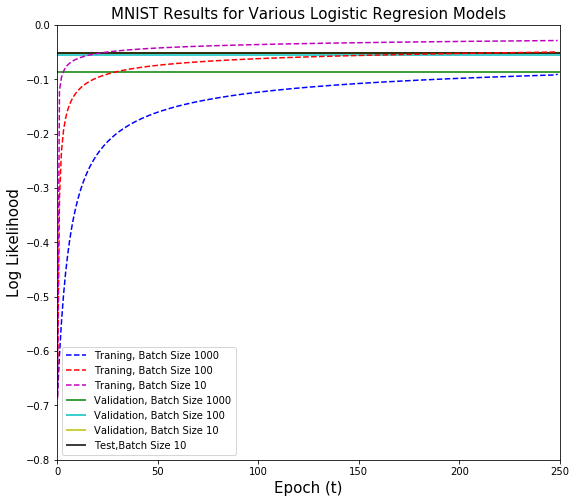

In [18]:
fig,ax = plt.subplots(1,1,figsize=(9,8))
ax.plot(range(stopEpochs),loglike_matrix2[0:stopEpochs,0],'b--')
ax.hlines(validation_loglike[0], 0, stopEpochs, colors='g')
ax.plot(range(stopEpochs),loglike_matrix2[0:stopEpochs,1],'r--')
ax.hlines(validation_loglike[1], 0, stopEpochs, colors='c')
ax.plot(range(stopEpochs),loglike_matrix2[0:stopEpochs,2],'m--')
ax.hlines(validation_loglike[2], 0, stopEpochs, colors='y')
ax.hlines(test_loglike, 0, stopEpochs, colors = 'k')
ax.legend(["Traning, Batch Size 1000",
           "Traning, Batch Size 100",
           "Traning, Batch Size 10",
           "Validation, Batch Size 1000",
           "Validation, Batch Size 100",
           "Validation, Batch Size 10",
           "Test,Batch Size 10"])
ax.set_title("MNIST Results for Various Logistic Regresion Models",fontsize=15)
plt.xlabel("Epoch (t)",fontsize=15)
plt.ylabel("Log Likelihood",fontsize=15)
plt.xlim((0,250))
plt.ylim((-0.8,0.0))

### Prob 1.2.1

In [19]:
Training_Error_list = [None]*3
Validation_Error_list = [None]*3
Test_Error_list = [None]*3
Training_like_list = [None]*3
Validation_like_list = [None]*3
Test_like_list = [None]*3
for i in range(3):
    Training_Error_list[i]  = err_rate(Xtr,beta_matrix2[:,i],Ytr)
    Validation_Error_list[i]= err_rate(Xva,beta_matrix2[:,i],Yva)
    Test_Error_list[i]      = err_rate(Xte,beta_matrix2[:,i],Yte)
    Training_like_list[i]   = loglike(Xtr,beta_matrix2[:,i],Ytr)
    Validation_like_list[i] = loglike(Xva,beta_matrix2[:,i],Yva)
    Test_like_list[i]       = loglike(Xte,beta_matrix2[:,i],Yte)

In [20]:
import pandas as pd
import os
new_dataframe = pd.DataFrame(
    {
        "Training Error" : Training_Error_list,
        "Validation Error":Validation_Error_list,
        "Test Error":Test_Error_list 
    },
    index = ['Batch Size 1000','Batch Size 100','Batch Size 10']
)
new_dataframe

,Training Error,Validation Error,Test Error
Batch Size 1000,0.027358,0.023659,0.022454
Batch Size 100,0.015316,0.016054,0.015666
Batch Size 10,0.008662,0.015209,0.017232


In [21]:
new_dataframe = pd.DataFrame(
    {
        "Training Log Likelihood" : Training_like_list,
        "Validation Log Likelihood":Validation_like_list,
        "Test Log Likelihood":Test_like_list 
    },
    index = ['Batch Size 1000','Batch Size 100','Batch Size 10']
)
new_dataframe

,Training Log Likelihood,Validation Log Likelihood,Test Log Likelihood
Batch Size 1000,-0.090410,-0.086988,-0.081827
Batch Size 100,-0.049727,-0.056108,-0.054370
Batch Size 10,-0.028701,-0.051667,-0.051401


### Prob 1.2.3

### Prob 2 setup

In [22]:
def get_matrix2(X,parameter_list,stopEpochs):
    beta_matrix = np.zeros((Xtr.shape[1],len(parameter_list)))
    loglike_matrix = np.zeros((stopEpochs+1,len(parameter_list)))
    return beta_matrix,loglike_matrix

def train_stoch_RM(X,beta,Y,alpha0,M,stopEpochs):
    N,P = X.shape
    alpha = alpha0
    t_ext = np.int(np.floor(stopEpochs*N/M))
    log_like = arr([None]*stopEpochs)
    j = 0
    res = [np.int(np.floor((t_ext)/stopEpochs)),np.int(np.ceil((t_ext)/stopEpochs))]
    arry = np.arange(N)
    np.random.shuffle(arry)
    new_array = np.split(arry[0:np.int(res[0]*M)],res[0])
    for i in range(t_ext):
        ind = new_array[np.int(i%(res[0]))]
        alpha = alpha0/(i+1)
        beta += alpha*loglike_grad_stoch(X,beta,Y,ind)
        if i%np.int(res[1]) ==0 or i == np.int(t_ext-1):
            log_like[j] = loglike(X,beta,Y)
            if j<stopEpochs-1:
                j +=1
    return beta,log_like


### Prob 2.1.1 Robbins-Monro

In [23]:
batch_size = [200]
stopEpochs = 50
beta_matrix2,loglike_matrix2 = get_matrix2(Xtr,batch_size,stopEpochs)
beta = np.random.normal(scale=.001,size=(Xtr.shape[1],1))
loglike_matrix2[:,0] = loglike(Xtr,beta,Ytr)

for k,M in enumerate(batch_size):
    endl = np.int(np.floor(stopEpochs*Xtr.shape[0]/M))
    print(endl)
    alpha = 0.1
    beta,log_like = train_stoch_RM(Xtr,beta,Ytr,alpha,M,stopEpochs)
    beta_matrix2[:,k] = beta.T.flatten()
    loglike_matrix2[1:,k] = log_like.T.flatten()   

2366


(-0.8, 0.0)

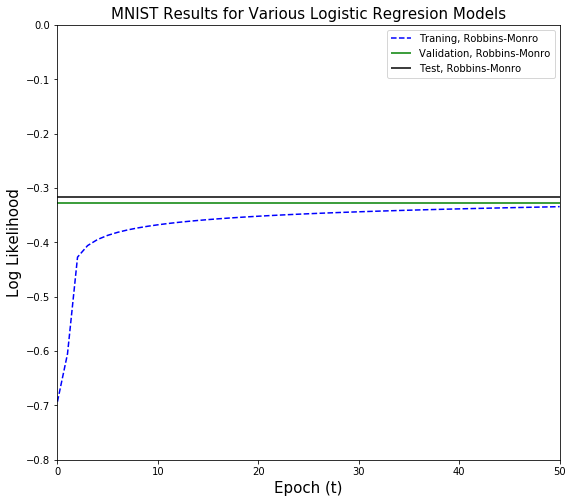

In [24]:
validation_loglike = np.zeros((1,1))
for i in range(1):
    validation_loglike[i] = loglike(Xva,beta_matrix2[:,i],Yva)
test_loglike = loglike(Xte,beta_matrix2[:,np.argmax(validation_loglike)],Yte)
fig,ax = plt.subplots(1,1,figsize=(9,8))
ax.plot(range(0,stopEpochs+1),loglike_matrix2,'b--')
ax.hlines(validation_loglike, 0, stopEpochs, colors='g')
ax.hlines(test_loglike, 0, stopEpochs, colors = 'k')
ax.legend(["Traning, Robbins-Monro",
           "Validation, Robbins-Monro",
           "Test, Robbins-Monro"])
ax.set_title("MNIST Results for Various Logistic Regresion Models",fontsize=15)
plt.xlabel("Epoch (t)",fontsize=15)
plt.ylabel("Log Likelihood",fontsize=15)
plt.xlim((0,50))
plt.ylim((-0.8,0.0))

In [25]:
import copy
Training_Error_list = [None]*1
Validation_Error_list = [None]*1
Test_Error_list = [None]*1
Training_like_list = [None]*1
Validation_like_list = [None]*1
Test_like_list = [None]*1
for i in range(1):
    Training_Error_list[i]  = err_rate(Xtr,beta_matrix2[:,i],Ytr)
    Validation_Error_list[i]= err_rate(Xva,beta_matrix2[:,i],Yva)
    Test_Error_list[i]      = err_rate(Xte,beta_matrix2[:,i],Yte)
    Training_like_list[i]   = loglike(Xtr,beta_matrix2[:,i],Ytr)
    Validation_like_list[i] = loglike(Xva,beta_matrix2[:,i],Yva)
    Test_like_list[i]       = loglike(Xte,beta_matrix2[:,i],Yte)
    
loglike_matrix_rm = copy.copy(loglike_matrix2)

Training_Error_rm  = err_rate(Xtr,beta_matrix2[:,i],Ytr)
Validation_Error_rm= err_rate(Xva,beta_matrix2[:,i],Yva)
Test_Error_rm      = err_rate(Xte,beta_matrix2[:,i],Yte)
Training_like_rm   = loglike(Xtr,beta_matrix2[:,i],Ytr)
Validation_like_rm = loglike(Xva,beta_matrix2[:,i],Yva)
Test_like_rm       = loglike(Xte,beta_matrix2[:,i],Yte)

In [26]:
import pandas as pd
import os
new_dataframe = pd.DataFrame(
    {
        "Training Error" : Training_Error_list,
        "Validation Error":Validation_Error_list,
        "Test Error":Test_Error_list 
    },
    index = ['Robbins-Monro']
)
new_dataframe

,Training Error,Validation Error,Test Error
Robbins-Monro,0.052287,0.041825,0.038642


In [27]:
new_dataframe = pd.DataFrame(
    {
        "Training Log Likelihood" : Training_like_list,
        "Validation Log Likelihood":Validation_like_list,
        "Test Log Likelihood":Test_like_list 
    },
    index = ['Robbins-Monro']
)
new_dataframe

,Training Log Likelihood,Validation Log Likelihood,Test Log Likelihood
Robbins-Monro,-0.334296,-0.327885,-0.317392


### 2.1.2 AdaM

In [28]:
def get_AdaM_update(alpha_0,grad,adam_values,b1=.95,b2=.99,e=1e-8):
    adam_values['t'] +=1
    # update mean
    adam_values['mean']=b1*adam_values['mean']+(1-b1)*grad
    m_hat = adam_values['mean']/(1-b1**adam_values['t'])
    #update variance
    adam_values['var']=b2*adam_values['var']+(1-b2)*grad**2
    v_hat = adam_values['var']/(1-b2**adam_values['t'])
    return alpha_0 * m_hat/(np.sqrt(v_hat)+e)

def train_stoch_Adam(X,beta,Y,alpha0,M,stopEpochs):
    N,P = X.shape
    alpha = alpha0
    t_ext = np.int(np.floor(stopEpochs*N/M))
    log_like = arr([None]*stopEpochs)
    j = 0
    res = [np.int(np.floor((t_ext)/stopEpochs)),np.int(np.ceil((t_ext)/stopEpochs))]
    arry = np.arange(N)
    np.random.shuffle(arry)
    new_array = np.split(arry[0:np.int(res[0]*M)],res[0])
    for i in range(t_ext):
        ind = new_array[np.int(i%(res[0]))]
        alpha = alpha0/(i+1)
        beta_grad = loglike_grad_stoch(Xtr,beta,Ytr,ind)
        beta_update = get_AdaM_update(alpha_0,beta_grad,adam_values)
        beta+=beta_update
        if i%np.int(res[1]) ==0 or i == np.int(t_ext-1):
            log_like[j] = loglike(X,beta,Y)
            if j<stopEpochs-1:
                j +=1
    return beta,log_like

In [29]:
batch_size = [200]
stopEpochs = 50
beta_matrix2,loglike_matrix2 = get_matrix2(Xtr,batch_size,stopEpochs)
beta = np.random.normal(scale=.001,size=(Xtr.shape[1],1))
loglike_matrix2[:,0] = loglike(Xtr,beta,Ytr)
adam_values = {'mean':np.zeros(beta.shape),'var':np.zeros(beta.shape),'t':0}
for k,M in enumerate(batch_size):
    endl = np.int(np.floor(stopEpochs*Xtr.shape[0]/M))
    print(endl)
    alpha_0 = 0.001
    beta,log_like = train_stoch_Adam(Xtr,beta,Ytr,alpha_0,M,stopEpochs)
    beta_matrix2[:,k] = beta.T.flatten()
    loglike_matrix2[1:,k] = log_like.T.flatten()   

2366


(-0.8, 0.0)

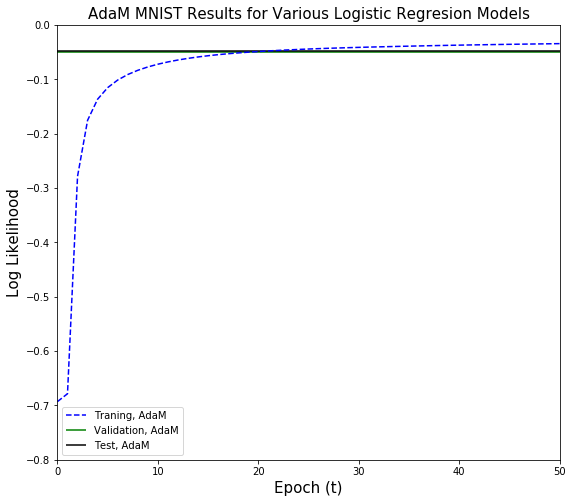

In [30]:
import copy
validation_loglike = np.zeros((1,1))
for i in range(1):
    validation_loglike[i] = loglike(Xva,beta_matrix2,Yva)
test_loglike = loglike(Xte,beta_matrix2,Yte)
fig,ax = plt.subplots(1,1,figsize=(9,8))
ax.plot(range(0,stopEpochs+1),loglike_matrix2,'b--')
ax.hlines(validation_loglike, 0, stopEpochs, colors='g')
ax.hlines(test_loglike, 0, stopEpochs, colors = 'k')
ax.legend(["Traning, AdaM",
           "Validation, AdaM",
           "Test, AdaM"])
ax.set_title("AdaM MNIST Results for Various Logistic Regresion Models",fontsize=15)
plt.xlabel("Epoch (t)",fontsize=15)
plt.ylabel("Log Likelihood",fontsize=15)
plt.xlim((0,50))
plt.ylim((-0.8,0.0))


In [31]:
Training_Error_list = [None]*1
Validation_Error_list = [None]*1
Test_Error_list = [None]*1
Training_like_list = [None]*1
Validation_like_list = [None]*1
Test_like_list = [None]*1
for i in range(1):
    Training_Error_list[i]  = err_rate(Xtr,beta_matrix2[:,i],Ytr)
    Validation_Error_list[i]= err_rate(Xva,beta_matrix2[:,i],Yva)
    Test_Error_list[i]      = err_rate(Xte,beta_matrix2[:,i],Yte)
    Training_like_list[i]   = loglike(Xtr,beta_matrix2[:,i],Ytr)
    Validation_like_list[i] = loglike(Xva,beta_matrix2[:,i],Yva)
    Test_like_list[i]       = loglike(Xte,beta_matrix2[:,i],Yte)
    
    
loglike_matrix_am = copy.copy(loglike_matrix2)

Training_Error_am  = err_rate(Xtr,beta_matrix2[:,i],Ytr)
Validation_Error_am= err_rate(Xva,beta_matrix2[:,i],Yva)
Test_Error_am      = err_rate(Xte,beta_matrix2[:,i],Yte)
Training_like_am   = loglike(Xtr,beta_matrix2[:,i],Ytr)
Validation_like_am= loglike(Xva,beta_matrix2[:,i],Yva)
Test_like_am       = loglike(Xte,beta_matrix2[:,i],Yte)

In [32]:
import pandas as pd
import os
new_dataframe = pd.DataFrame(
    {
        "Training Error" : Training_Error_list,
        "Validation Error":Validation_Error_list,
        "Test Error":Test_Error_list 
    },
    index = ['AdaM']
)
new_dataframe

,Training Error,Validation Error,Test Error
AdaM,0.010246,0.013942,0.014099


In [33]:
new_dataframe = pd.DataFrame(
    {
        "Training Log Likelihood" : Training_like_list,
        "Validation Log Likelihood":Validation_like_list,
        "Test Log Likelihood":Test_like_list 
    },
    index = ['Adam']
)
new_dataframe



,Training Log Likelihood,Validation Log Likelihood,Test Log Likelihood
Adam,-0.034397,-0.049313,-0.047404


### Prob 2.1.3 Newton-Raphson

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from numpy import asarray as arr
from numpy import asmatrix as mat
from numpy import atleast_2d as twod
def f(X,beta):
    return 1/(1+np.exp(-X.dot(beta)))

def dfdx(X,beta):
    # ∂f(x,beta)/∂x = f(x,beta)(1 − f(x,beta))*∂z/∂x 
    return f(X,beta)*(1-f(X,beta))*beta  

def loglike(X,beta,Y):
    N,M = X.shape
    like = [None]*N
    for i in range(N):
        like[i] = np.log(f(X[i,:],beta)) if Y[i] else np.log(1-f(X[i,:],beta))
    return np.mean(like)

def loglike_grad(X,beta,Y):
    N,M = X.shape
    like_grad_beta = [None]*M
    like_grad_beta = np.dot((Y-f(X,beta)).T,X).T/N
    return arr(like_grad_beta)

def err_rate(X,beta,Y):
    N,M = X.shape
    predict = np.zeros(Y.shape)
    predict[f(X,beta)>0.5]=1
    return np.mean(predict!=Y)

def train(X,beta,Y,alpha,stopEpochs=250):
    log_like = arr([None]*stopEpochs)
    for i in range(stopEpochs):
        beta += alpha*loglike_grad(X,beta,Y)
        log_like[i] = loglike(X,beta,Y)
    return beta,log_like
def get_matrix(X,parameter_list,stopEpochs):
    beta_matrix = np.zeros((Xtr.shape[1],len(parameter_list)))
    loglike_matrix = np.zeros((stopEpochs,len(parameter_list)))
    return beta_matrix,loglike_matrix
def load_data_pairs(type_str):
    return pd.read_csv("./mnist_2s_and_6s/"+type_str+"_x.csv").values,pd.read_csv("./mnist_2s_and_6s/"+type_str+"_y.csv").values

Xtr,Ytr = load_data_pairs("train")
Xva,Yva = load_data_pairs("valid")
Xte,Yte = load_data_pairs("test")
Xtr = np.hstack([Xtr,np.ones((Xtr.shape[0],1))])
Xva = np.hstack([Xva,np.ones((Xva.shape[0],1))])
Xte = np.hstack([Xte,np.ones((Xte.shape[0],1))])


def get_matrix2(X,parameter_list,stopEpochs):
    beta_matrix = np.zeros((Xtr.shape[1],len(parameter_list)))
    loglike_matrix = np.zeros((stopEpochs+1,len(parameter_list)))
    return beta_matrix,loglike_matrix


#def loglike_grad_stoch(X,beta,Y,M):
#    N,P = X.shape
#    sample_stoch = np.sort(sample(range(N),np.int(M)))
#    like_grad_beta = [None]*P
#    like_grad_beta = np.dot((Y[sample_stoch]-f(X[sample_stoch],beta)).T,X[sample_stoch,:]).T/M
#    return arr(like_grad_beta)

def train_stoch(X,beta,Y,alpha,M,stopEpochs):
    N,P = X.shape
    t_ext = np.int(np.floor(stopEpochs*N/M))
    log_like = arr([None]*stopEpochs)
    j = 0
    for i in range(t_ext):
        beta += alpha*loglike_grad_stoch(X,beta,Y,M)
        res = [np.floor((t_ext)/stopEpochs),np.ceil((t_ext)/stopEpochs)]
        if i%np.int(res[1]) ==0 or i == np.int(t_ext-1):
            log_like[j] = loglike(X,beta,Y)
            if j<stopEpochs-1:
                j +=1
    return beta,log_like

def loglike_grad_stoch_newton(X,beta,Y,sample_stoch):
    N,P = X.shape
    like_grad_beta = [None]*P
    like_grad_beta = np.dot((Y[sample_stoch]-f(X[sample_stoch],beta)).T,X[sample_stoch,:]).T/M
    return arr(like_grad_beta)

In [35]:
import copy
from random import sample
def train_stoch_Newton(X,beta,Y,M,stopEpochs):
    N,P = X.shape
    t_ext = np.int(np.floor(stopEpochs*N/M))
    log_like = arr([None]*stopEpochs)
    j = 0
    res = [np.int(np.floor((t_ext)/stopEpochs)),np.int(np.ceil((t_ext)/stopEpochs))]
    arry = np.arange(N)
    np.random.shuffle(arry)
    new_array = np.split(arry[0:np.int(res[0]*M)],res[0])
    for i in range(t_ext):
        if i%100==0:
            print(i)
        ind = new_array[np.int(i%(res[0]))]
        sample_stoch = ind
        #Xnew = copy.copy(Xtr[sample_stoch,:])
        #XnewT = copy.copy(Xnew.T)
        #for k,kk in enumerate(sample_stoch):
        #    rate = f(Xtr[kk,:],beta)*(1-f(Xtr[kk,:],beta))
        #    XnewT[:,k] *= rate
        #alphat = np.dot(XnewT,Xnew)                                 
        #try:
        #    beta_incre = np.linalg.solve(alphat, loglike_grad_stoch_newton(X,beta,Y,sample_stoch))
        #    beta += beta_incre
        #except np.linalg.LinAlgError:
        #alpha = np.linalg.pinv(alphat)
        #beta += alpha.dot(loglike_grad_stoch(X,beta,Y,M))
        At = np.diag(arr([f(Xtr[kk,:],beta)*(1-f(Xtr[kk,:],beta)) for kk in sample_stoch]).flatten())
        alphat = np.dot(Xtr[sample_stoch].T,At).dot(Xtr[sample_stoch])
        try:
            alpha = np.linalg.inv(alphat)
        except np.linalg.LinAlgError:
            alpha = np.linalg.pinv(alphat)
        beta += alpha.dot(loglike_grad_stoch_newton(X,beta,Y,sample_stoch))
        
        if i%np.int(res[1]) ==0 or i == np.int(t_ext-1):
            log_like[j] = loglike(X,beta,Y)
            if j<stopEpochs-1:
                j +=1
    return beta,log_like

def loglike(X,beta,Y):
    N,M = X.shape
    like = [None]*N
    for i in range(N):
        like[i] = np.log(f(X[i,:],beta)) if Y[i] else np.log(1-f(X[i,:],beta))
    return np.mean(like)

In [36]:
batch_size = [200]
stopEpochs = 50
beta_matrix2,loglike_matrix2 = get_matrix2(Xtr,batch_size,stopEpochs)
beta = np.random.normal(scale=0.01,size= (Xtr.shape[1],1))
loglike_matrix2[:,0] = loglike(Xtr,beta,Ytr)

for k,M in enumerate(batch_size):
    endl = np.int(np.floor(stopEpochs*Xtr.shape[0]/M))
    print(endl)
    beta,log_like = train_stoch_Newton(Xtr,beta,Ytr,M,stopEpochs)
    beta_matrix2[:,k] = beta.T.flatten()
    loglike_matrix2[1:,k] = log_like.T.flatten()   

2366
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300


(-0.8, 0.0)

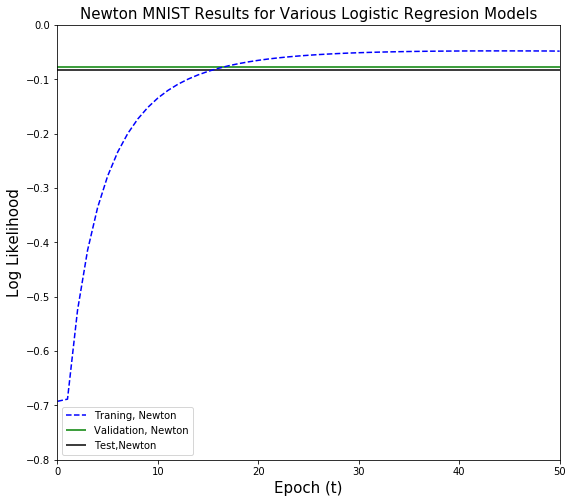

In [37]:
validation_loglike = np.zeros((1,1))
for i in range(1):
    validation_loglike[i] = loglike(Xva,beta_matrix2,Yva)
test_loglike = loglike(Xte,beta_matrix2,Yte)
fig,ax = plt.subplots(1,1,figsize=(9,8))
ax.plot(range(0,stopEpochs+1),loglike_matrix2,'b--')
ax.hlines(validation_loglike, 0, stopEpochs, colors='g')
ax.hlines(test_loglike, 0, stopEpochs, colors = 'k')
ax.legend(["Traning, Newton",
           "Validation, Newton",
           "Test,Newton"])
ax.set_title("Newton MNIST Results for Various Logistic Regresion Models",fontsize=15)
plt.xlabel("Epoch (t)",fontsize=15)
plt.ylabel("Log Likelihood",fontsize=15)
plt.xlim((0,50))
plt.ylim((-0.8,0.0))

In [38]:
Training_Error_list = [None]*1
Validation_Error_list = [None]*1
Test_Error_list = [None]*1
Training_like_list = [None]*1
Validation_like_list = [None]*1
Test_like_list = [None]*1
for i in range(1):
    Training_Error_list[i]  = err_rate(Xtr,beta_matrix2[:,i],Ytr)
    Validation_Error_list[i]= err_rate(Xva,beta_matrix2[:,i],Yva)
    Test_Error_list[i]      = err_rate(Xte,beta_matrix2[:,i],Yte)
    Training_like_list[i]   = loglike(Xtr,beta_matrix2[:,i],Ytr)
    Validation_like_list[i] = loglike(Xva,beta_matrix2[:,i],Yva)
    Test_like_list[i]       = loglike(Xte,beta_matrix2[:,i],Yte)
    
loglike_matrix_ne = copy.copy(loglike_matrix2)

Training_Error_ne  = err_rate(Xtr,beta_matrix2[:,i],Ytr)
Validation_Error_ne= err_rate(Xva,beta_matrix2[:,i],Yva)
Test_Error_ne      = err_rate(Xte,beta_matrix2[:,i],Yte)
Training_like_ne   = loglike(Xtr,beta_matrix2[:,i],Ytr)
Validation_like_ne= loglike(Xva,beta_matrix2[:,i],Yva)
Test_like_ne       = loglike(Xte,beta_matrix2[:,i],Yte)

In [39]:
import pandas as pd
import os
new_dataframe = pd.DataFrame(
    {
        "Training Error" : Training_Error_list,
        "Validation Error":Validation_Error_list,
        "Test Error":Test_Error_list 
    },
    index = ['Newton']
)
new_dataframe

,Training Error,Validation Error,Test Error
Newton,0.019858,0.021969,0.018799


In [40]:
new_dataframe = pd.DataFrame(
    {
        "Training Log Likelihood" : Training_like_list,
        "Validation Log Likelihood":Validation_like_list,
        "Test Log Likelihood":Test_like_list 
    },
    index = ['Newton']
)
new_dataframe

,Training Log Likelihood,Validation Log Likelihood,Test Log Likelihood
Newton,-0.048226,-0.076712,-0.083347


(-0.8, 0.0)

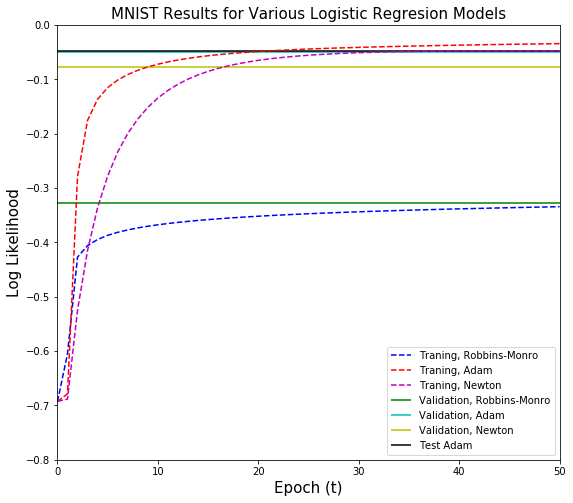

In [41]:
test_loglike = np.max([Test_like_rm,Test_like_am,Test_like_ne])
fig,ax = plt.subplots(1,1,figsize=(9,8))
ax.plot(range(0,stopEpochs+1),loglike_matrix_rm,'b--')
ax.hlines(Validation_like_rm, 0, 50, colors='g')
ax.plot(range(0,stopEpochs+1),loglike_matrix_am,'r--')
ax.hlines(Validation_like_am, 0, 50, colors='c')
ax.plot(range(0,stopEpochs+1),loglike_matrix_ne,'m--')
ax.hlines(Validation_like_ne, 0, 50, colors='y')
ax.hlines(test_loglike, 0, 50, colors = 'k')
ax.legend(["Traning, Robbins-Monro",
           "Traning, Adam",
           "Traning, Newton",
           "Validation, Robbins-Monro",
           "Validation, Adam",
           "Validation, Newton",
           "Test Adam"])
ax.set_title("MNIST Results for Various Logistic Regresion Models",fontsize=15)
plt.xlabel("Epoch (t)",fontsize=15)
plt.ylabel("Log Likelihood",fontsize=15)
plt.xlim((0,50))
plt.ylim((-0.8,0.0))

In [42]:
import pandas as pd
import os
new_dataframe = pd.DataFrame(
    {
        "Training Error" : [Training_Error_rm,Training_Error_am,Training_Error_ne],
        "Validation Error":[Validation_Error_rm,Validation_Error_am,Validation_Error_ne],
        "Test Error":[Test_Error_rm,Test_Error_am,Test_Error_ne] 
    },
    index = ['Robbins-Monro','Adam','Newton']
)
new_dataframe


,Training Error,Validation Error,Test Error
Robbins-Monro,0.052287,0.041825,0.038642
Adam,0.010246,0.013942,0.014099
Newton,0.019858,0.021969,0.018799


In [43]:
import pandas as pd
import os
new_dataframe = pd.DataFrame(
    {
        "Training Loglikelihood" : [Training_like_rm,Training_like_am,Training_like_ne],
        "Validation Loglikelihood":[Validation_like_rm,Validation_like_am,Validation_like_ne],
        "Test Loglikelihood":[Test_like_rm,Test_like_am,Test_like_ne] 
    },
    index = ['Robbins-Monro','Adam','Newton']
)
new_dataframe

,Training Loglikelihood,Validation Loglikelihood,Test Loglikelihood
Robbins-Monro,-0.334296,-0.327885,-0.317392
Adam,-0.034397,-0.049313,-0.047404
Newton,-0.048226,-0.076712,-0.083347
